In [4]:
from sklearn.impute import SimpleImputer
import pandas as pd

In [5]:
df = pd.read_csv("../data/rent_prices_long.csv")


In [6]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.date

In [7]:
df[["Date"]].dtypes

Date    object
dtype: object

In [8]:
df.sort_values(['areaName', 'Date'])

,areaName,Borough,areaType,Date,Value
0,All Downtown,Manhattan,submarket,2010-01-01,3200.0
198,All Downtown,Manhattan,submarket,2010-02-01,3200.0
396,All Downtown,Manhattan,submarket,2010-03-01,3015.0
594,All Downtown,Manhattan,submarket,2010-04-01,3100.0
792,All Downtown,Manhattan,submarket,2010-05-01,3100.0
...,...,...,...,...,...
37421,Woodstock,Bronx,neighborhood,2025-09-01,NaN
37619,Woodstock,Bronx,neighborhood,2025-10-01,NaN
37817,Woodstock,Bronx,neighborhood,2025-11-01,NaN
11825,"df_cutoff = df_cutoff[df_cutoff[""areaName""] !=...",Bronx,neighborhood,2014-12-01,NaN


In [9]:
# Use .count() to count non-null values in the 'Value' column for each 'areaName'
group_counts = df.groupby("areaName")["Value"].count()

# Select the areaNames that have a count less than 10
# This returns a pandas Index object containing the areaName strings.
small_groups = group_counts[group_counts > 150].index

small_groups

Index(['All Downtown', 'All Midtown', 'All Upper East Side',
       'All Upper Manhattan', 'All Upper West Side', 'Astoria',
       'Battery Park City', 'Bay Ridge', 'Bayside', 'Bedford-Stuyvesant',
       ...
       'Tribeca', 'University Heights', 'Upper East Side', 'Upper West Side',
       'Washington Heights', 'West Harlem', 'West Village', 'Williamsburg',
       'Windsor Terrace', 'Woodside'],
      dtype='object', name='areaName', length=111)

In [10]:
df_cleaned = df.groupby("areaName").filter(lambda x: x["Value"].count() > 150)
df_cleaned.sort_values(['areaName', 'Date'])


,areaName,Borough,areaType,Date,Value
0,All Downtown,Manhattan,submarket,2010-01-01,3200.0
198,All Downtown,Manhattan,submarket,2010-02-01,3200.0
396,All Downtown,Manhattan,submarket,2010-03-01,3015.0
594,All Downtown,Manhattan,submarket,2010-04-01,3100.0
792,All Downtown,Manhattan,submarket,2010-05-01,3100.0
...,...,...,...,...,...
37024,Woodside,Queens,neighborhood,2025-07-01,3050.0
37222,Woodside,Queens,neighborhood,2025-08-01,3025.0
37420,Woodside,Queens,neighborhood,2025-09-01,3025.0
37618,Woodside,Queens,neighborhood,2025-10-01,3150.0


In [11]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)


def impute_group(group_df):
    values = group_df[["Value"]]
    imputed_array = imputer.fit_transform(values)
    group_df['Value_Imputed'] = imputed_array
    return group_df

df_imputed = df_cleaned.groupby("areaName", as_index=False).apply(impute_group, include_groups=True)

/var/folders/5g/m0r4gtb92cd65m1l48wr7sf00000gn/T/ipykernel_10298/662960669.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_cleaned.groupby("areaName", as_index=False).apply(impute_group, include_groups=True)


In [12]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Value'>

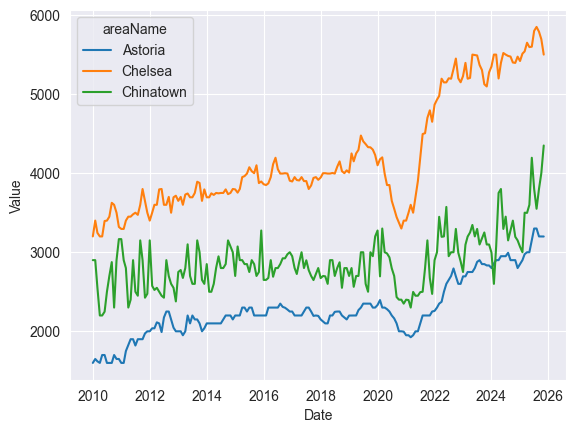

In [21]:
sns.lineplot(data=df_imputed[df_imputed['areaName'].isin(['Astoria', 'Chinatown', 'Chelsea'])], x="Date", y="Value_Imputed", hue="areaName")

In [24]:
df_imputed.to_csv('../data/rent_prices_long_imputed.csv', index=False)